In [ ]:
# Hand-build

In [4]:
import json
import numpy as np
import pykep as pk
from pykep.planet import jpl_lp
from pykep import epoch
import pygmo as pg
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from numba import njit
import os 

%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append("../")
import pyxplorer as pxp

In [6]:
pk.util.load_spice_kernel(os.path.join(os.environ.get("SPICE"), "spk", "de440.bsp"))
pk.util.load_spice_kernel(os.path.join(os.environ.get("SPICE"), "lsk", "naif0012.tls"))

ssdict = pxp.solar_system_spice()

In [7]:
seq = [
    ssdict["earth"], ssdict["jupiter"], ssdict["saturn"]
]

In [8]:
tof = [
        [3.1/pk.DAY2YEAR, 3.6/pk.DAY2YEAR],
        [4.1/pk.DAY2YEAR, 4.5/pk.DAY2YEAR],
]

In [10]:
t0 = [
    pk.epoch_from_string('2036-08-01 00:00:00.000').mjd2000,
    pk.epoch_from_string('2036-10-01 00:00:00.000').mjd2000
]
t0

[13362.0, 13423.0]

In [12]:
C3 = 91.7
vinf_launch_max = np.sqrt(C3)

In [15]:
prob_head = pxp.mga_1dsm(
    seq = seq,
    t0 = t0,
    tof=tof,
    vinf = [0.95*vinf_launch_max, vinf_launch_max], 
    multi_objective = False, 
    add_vinf_dep = False, 
    add_vinf_arr = True,
    tof_encoding = 'direct'
)

In [24]:
algo = pxp.algo_factory("sade")

In [28]:
pop = pg.population(prob=prob_head, size=100)
pop = algo.evolve(pop)
print("Done!")

Done!


In [29]:
prob_head.pretty(pop.champion_x)

First Leg: 3, SUN, ECLIPJ2000 to 5, SUN, ECLIPJ2000
Departure: 2036-Aug-27 15:04:35.842455 (13388.628192621005 mjd2000) 
Duration: 1205.4516155387503days
VINF: 9.576011652901231 km/sec
DSM after 355.3219831122596 days
DSM magnitude: 14.383561116195999m/s

leg no. 2: 5, SUN, ECLIPJ2000 to 6, SUN, ECLIPJ2000
Duration: 1643.6249999999998days
Fly-by epoch: 2039-Dec-16 01:54:55.425003 (14594.079808159755 mjd2000) 
Fly-by radius: 10.006294490747457 planetary radii
DSM after 186.44214074818416 days
DSM magnitude: 2.3712558720828852e-05m/s

Arrival at 6, SUN, ECLIPJ2000
Arrival epoch: 2044-Jun-15 16:54:55.425003 (16237.704808159755 mjd2000) 
Arrival Vinf: 3421.6542960326174m/s
Total mission time: 7.80034665445243 years (2849.07661553875 days)


In [32]:
np.sqrt(pk.MU_SUN/(9.571*pk.AU))/1e3

9.62752051927854

<IPython.core.display.Javascript object>


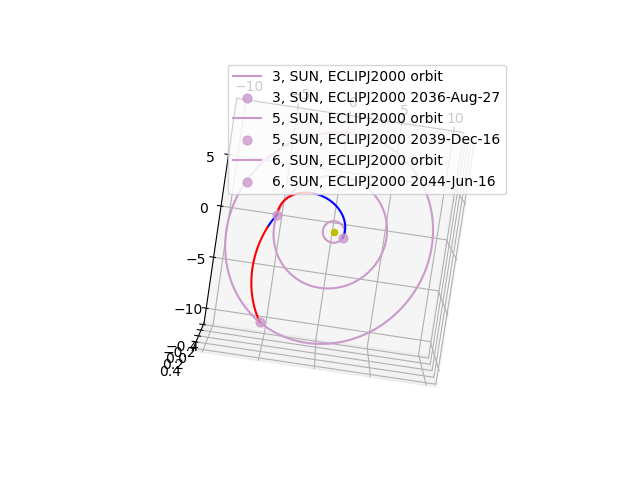

<Axes3DSubplot:>

In [27]:
prob_head.plot(pop.champion_x)

In [33]:
vinf = 3.4e3

In [38]:
rp = 1221914042

In [41]:
np.sqrt(2*pxp.MU_SATURN/rp)  # escape vel at titan orbit

7880.371335425867

In [46]:
def visvisa_vinf(vinf, mu, r):
    return np.sqrt(2*(vinf**2/2 + mu/r))

In [48]:
visvisa_vinf(vinf, pxp.MU_SATURN, rp) - np.sqrt(2*pxp.MU_SATURN/rp) 

702.1837843622761